In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from numba import jit

In [ ]:
import numpy as np
import os
import pandas as pd

moneybar_dtype = np.dtype([
    ("bid", np.float64),
    ("ask", np.float64),
    ("mlast", np.float64),
    ("msc", np.int64)
])

In [5]:
cd D:\Users\andre.ferreira\AppData\Roaming\MetaQuotes\Terminal\8B052D0699A0083067EBF3A36123603B\MQL5\Files

[WinError 3] The system cannot find the path specified: 'D:\\Users\\andre.ferreira\\AppData\\Roaming\\MetaQuotes\\Terminal\\8B052D0699A0083067EBF3A36123603B\\MQL5\\Files'
C:\Users\andre\Projects\stocks\prototypes


In [6]:
cd D:\MetaTrader 5\hard_link_AppDataRoamingMetaQuotes_Terminal\8B052D0699A0083067EBF3A36123603B\MQL5\Files

D:\MetaTrader 5\hard_link_AppDataRoamingMetaQuotes_Terminal\8B052D0699A0083067EBF3A36123603B\MQL5\Files


In [7]:
data = np.fromfile('WINV19_0.5_mbar.bin', dtype=moneybar_dtype)

In [8]:
moneybar_dtype.fields

mappingproxy({'bid': (dtype('float64'), 0),
              'ask': (dtype('float64'), 8),
              'mlast': (dtype('float64'), 16),
              'msc': (dtype('int64'), 24)})

In [9]:
dfdata = pd.DataFrame.from_records(data)

In [10]:
#dfdata.msc = dfdata.msc.astype('datetime64[ms]')

In [11]:
dfdata.head()

,bid,ask,mlast,msc
0,109000.0,94960.0,104065.0,1571162473502
1,109000.0,94960.0,104065.0,1571162473502
2,109000.0,94960.0,104065.0,1571162473502
3,109000.0,94960.0,104065.0,1571162473502
4,109000.0,94960.0,104065.0,1571162473502


In [12]:
dfdata.set_index(dfdata.msc, drop=True, inplace=True)

In [13]:
dfdata.sort_index(inplace=True)

In [14]:
dfdata.drop(columns='msc', inplace=True)

In [15]:
dfdata.head()

,bid,ask,mlast
msc,,,
1569323207686,104230.0,104235.0,104235.0
1569323207686,104230.0,104235.0,104235.0
1569323207686,104230.0,104235.0,104235.0
1569323207686,104230.0,104235.0,104235.0
1569323207733,104230.0,104235.0,104235.0


In [16]:
dfdatadata = dfdata[:200000]

In [17]:
cd D:\Users\andre.ferreira\Projects\stocks\prototypes

[WinError 3] The system cannot find the path specified: 'D:\\Users\\andre.ferreira\\Projects\\stocks\\prototypes'
D:\MetaTrader 5\hard_link_AppDataRoamingMetaQuotes_Terminal\8B052D0699A0083067EBF3A36123603B\MQL5\Files


In [18]:
cd C:\Users\andre\Projects\stocks\prototypes

C:\Users\andre\Projects\stocks\prototypes


### Fractional Diferences - Preserving Memory in Stationary Time Series

### First order derivative Fractional

Finite diferences coeficientes backward for series can be written with following formula. 
Where $n$ is the derivative order, $h$ is the discrete increment in $t$ and $k$ is the order of the schema. 

$$ \Delta^{n}_{h} f(t) = \sum_{i=0}^{n} (-1)^{i} \binom{n}{i} f\left(t-ih\right) $$

for h=1 considering f(t) as discrete time series and using the notation $ f(t) = X_t $ we can write:


$$ \Delta^{n} X_t = \sum_{i=0}^{n} (-1)^{i} \binom{n}{i} X_{t-i} $$


Considering the case where n=1 first order derivative. 

$$ \Delta^{1} X_t = \sum_{i=0}^{1} (-1)^{i} \binom{1}{i} X_{t-i} $$


$$ \binom{n}{k} = \frac{n!}{k! (n-k)!} $$

$$ i(0) = \frac{1!}{0!(1-0)!}X_{t-0} = X_t $$
$$ i(1) = \frac{1!}{1(1-1)!}X_{t-1} = -X_{t-1} $$

We get equation bellow:
$$ \Delta^{1} X_t = \sum_{i=0}^{1} (-1)^{i} \binom{1}{i} X_{t-i} = X_t -X_{t-1} $$                             

Using the notation for the lag operator $B$ defined for a time series $X_t$ as 
$ B X_t = X_{t-1} $.  Also polynomials of this operator are understood as repeated application, e.g. $B^2X_t=X_{t-2}$ . 

We can write 

$$ \Delta^1 X_t = X_t - X_{t-1} = (1-B)^1 X_t $$

BUT let's consider for while that we want the half or fractional derivative them we can expand $(1-B)^d$ using Binomial coefficients:

![title](frac_differences.png)

Those are the coeficients multiplying the time series $X_t$, $X_{t-1}$, $X_{t-2}$ etc. Like   


$$ \sum^{\infty }_{k=0} \frac{\prod^{k-1}_{a=0} (d-a)(-B)^k }{k!} $$


$$ 1X_t - dB X_t + \frac{d(d-1)}{2!}B^2X_t - ... =  X_t - dX_{t-1} + \frac{d(d-1)}{2!}X_{t-2} - ... $$







## Better original book pages

![title](frac_dif_1.png)

![title](frac_dif_2.png)

### Filter weights calculation

- for k = 0 until we desire. 
- w0 = 1
- as k goes to inf. the weights corresponds to coeficients of more negative samples

$$ \omega_{k} = -\omega_{k-1}\frac{d-k+1}{k} $$

In [58]:
from numba import jit

@jit(nopython=True)
def getWeights(d, size):    
    w = np.zeros(size)
    w[0] = 1.
    for k in range(1, size):
        w[k]=-w[k-1]/k*(d-k+1)
    return w[::-1]

In [59]:
getWeights(0.5, 10)

array([-0.01091003, -0.01309204, -0.01611328, -0.02050781, -0.02734375,
       -0.0390625 , -0.0625    , -0.125     , -0.5       ,  1.        ])

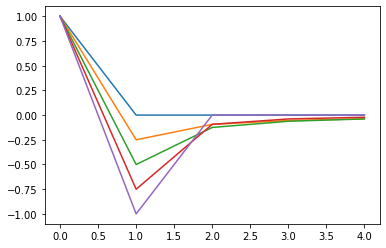

In [60]:
for d in np.linspace(0, 1, 5):
    plt.plot(getWeights(d, 5)[::-1], label=str(d))

### Testing Frac-Diff with 30k money bars

- The bigger the filter size better the stationarity achieved
- The bigger the fractional (closer to 1) better the stationarity achieved
    - but we want it to be smaller as possible to preserve as much memory as possible
- Tested differente fractional values and filter sizes
- On production better be conservative using a bigger fractional value and bigger filter size
    - Like 0.60 and ksize=512 

In [61]:
data = dfdata.mlast[:30000].values

In [62]:
ksize = 512

Generic function to get filter kernel based on desired kernel size
 - considering only cross-correlation dont need to append zero
 - if you think about a filter kernel you need to append zeros and make a convolution

In [63]:
def getKernel(ksize, d=0.45):    
    kernel = getWeights(d, ksize)
    return kernel

In [64]:
kernel = getKernel(ksize, d=0.56)

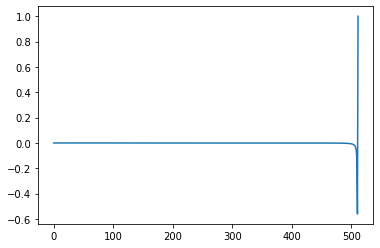

In [65]:
plt.plot(kernel)

In [66]:
np.sum(kernel)

0.015111031233626414

For the data array the first valid sample at [kernel.size-1]  
ksize-1 samples before are needed to produce the sample at 0 

- Getting only the valid samples is what we want!
 - [kernel.size-1:corrsize-kernel.size+1] 
 - is the same as mode='valid'

In [67]:
from scipy.signal import correlate as fftcorr

In [68]:
corrsize = kernel.size + data.size - 1

In [69]:
len(data), ksize, len(data)-ksize+1, corrsize-(ksize-1)*2

(30000, 512, 29489, 29489)

In [79]:
%%time
data_filter = fftcorr(data, kernel)[kernel.size-1:corrsize-kernel.size+1]
# data_filter = fftcorr(data, kernel, mode='valid')
# much faster above due fft convolve default used
#%%time
#data_filtered = np.convolve(data, kernel[::-1])[kernel.size:corrsize-ksize]

Wall time: 1.99 ms


### Mql5 fft correlation adaptation 
- the negative lags are in the end 

eg. 

    in = [1, 1, 2, 1, 1]  # m size 5
    ksize = 3
    filter = [1, 2, 1]  # n size 3
    corrsize = 7 # m+n-1
    expected output = [1, 3, 5, 6, 5, 3, 1]
         mql output = [5, 6, 5, 3, 1, 1, 3]
    
**We want is only the region with full overlapping with the coeficients of the filter that are nonzero.**

So the clipped output is for python:
 - [5, 6, 5] 
 - ksize-1 until full overlap with filter
 - corrsize-ksize+1 in the end
 - [ksize-1, corrsize-ksize+1] [close to the right and, open to the left < corrsize-ksize+1]
 
For mql5, starts with full overlapping
 - [0, corrsize-(ksize-1)*2] [close to the right and, open to the left < corrsize-(ksize-1)*2]

In [71]:
#inp = [1, 1, 2, 1, 1]
#pat = [1, 2, 1]
#fftcorr(inp, pat, mode='full')
#fftcorr(inp, pat, mode='valid')

### Pytorch using GPU much faster

- convolution is in fact a correlation

In [72]:
import torch as th

In [73]:
if th.cuda.is_available():
    thdevice = th.device('cuda')
else:
    thdevice = th.device('cpu')

In [74]:
thdevice

device(type='cuda')

In [75]:
thkernel = th.tensor(kernel.astype(np.float), device=thdevice).reshape((1, 1, -1))
thdata = th.tensor(data, device=thdevice).reshape(1, 1, -1)

In [76]:
%%time
thres = th.conv1d(thdata, thkernel)
# CPU use intel i5 2/4 cores
## 129 ms ± 8.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# CPU intel i7 4/8 cores 
## 69.7 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# CUDA GTX 1060
# 7.54 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Wall time: 996 µs


In [77]:
thres = th.conv1d(thdata, thkernel)
thres = thres.to('cpu').numpy().flatten()

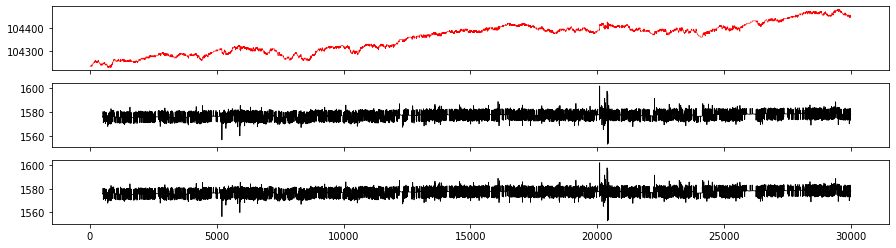

In [80]:
fig, axr = plt.subplots(3, sharex=True, figsize=(15,4))
axr[0].plot(data, 'r-', lw=0.6)
axr[1].plot(np.arange(kernel.size-1, len(data)), data_filter, 'k-', lw=0.8)
axr[2].plot(np.arange(kernel.size-1, len(data)), thres, 'k-', lw=0.8)

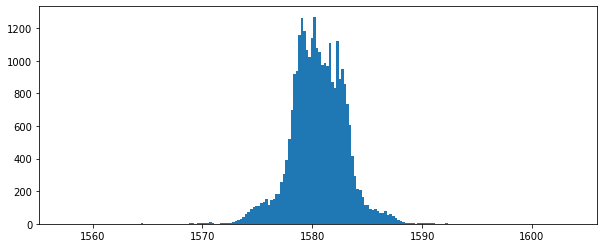

In [33]:
plt.figure(figsize=(10, 4))
plt.hist(data_filter, bins=200);

### Augmented Dickey–Fuller test

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

- dfuller()[1]:   
    - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.  
    - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.  
    
    
- dfuller()[0]:  
    - ADF Statistic - compare with critical values if smaller it is stationary 
    
 
- dfuller()[4]:  
    - 1%  - 99% confidence limit for being not stationary
    - 5%  - 95% confidence limit for being not stationary
    - 10% - 90% confidence limit for being not stationary

In [34]:
#from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller(data_filter)

(-6.00407374551551,
 1.631246925286447e-07,
 50,
 29438,
 {'1%': -3.4305721574260146,
  '5%': -2.8616381875084556,
  '10%': -2.5668222622264043},
 122379.96921056064)

In [36]:
adfuller(data)

(-1.0274496322528497,
 0.7431215046442408,
 32,
 29967,
 {'1%': -3.430568235400205,
  '5%': -2.861636454144003,
  '10%': -2.566821339598106},
 124258.8352267315)

Deleting all memory with 1 integer differatiation

In [37]:
adfuller(np.diff(data))

(-37.43534236795788,
 0.0,
 31,
 29967,
 {'1%': -3.430568235400205,
  '5%': -2.861636454144003,
  '10%': -2.566821339598106},
 124254.7799686924)

## Using time information to create features (from datetime ms)

 - Velocity? better not create another feature that is stationary with memory?



 - Velocity with first order differenciation is memoryless 
     - altough is stationary
 - Fractional diff over datetime in ms directly even using log transform requires values of 0.9 or more to be effective
 - Let's try subtracting the begin of each day from each time-stamp
 - times will have a maximum value of 
     - 7hoursx60minx60secs = 25,200 seconds or x 1000 (ms) = 25,200,000
     - 8hoursx60minx60secs = 28,800 seconds or x 1000 (ms) = 28,800,000

In [45]:
data = dfdata.mlast[:30000].index.values

In [46]:
velocity = data[1:]-data[:-1]

In [47]:
adfuller(velocity)

(-15.615466959167689,
 1.7583124228609835e-28,
 50,
 29948,
 {'1%': -3.4305683738678185,
  '5%': -2.8616365153406917,
  '10%': -2.5668213721716278},
 249622.19029778417)

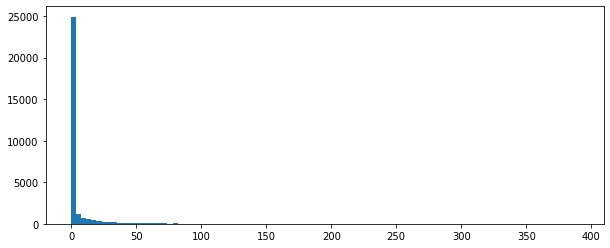

In [48]:
plt.figure(figsize=(10, 4))
plt.hist(velocity, bins=100);

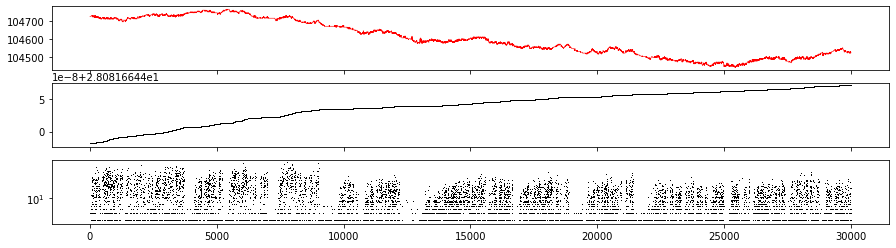

In [49]:
fig, axr = plt.subplots(3, sharex=True, figsize=(15,4))
axr[0].plot(dfdata.mlast[:30000].values[:-1], 'r', lw=0.6)
axr[1].plot(np.log(data[:-1]), 'k,', lw=0.8)
axr[2].plot(velocity, 'k,', lw=0.8)
axr[2].set_yscale('log')

In [50]:
data = dfdata.mlast[:30000].index.values

In [51]:
data = np.log10(data)

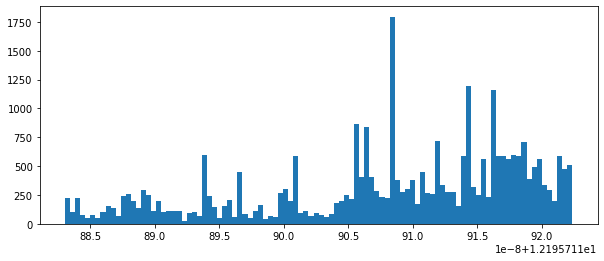

In [52]:
plt.figure(figsize=(10, 4))
plt.hist(data, bins=100);

In [53]:
kernel = getKernel(ksize, d=0.88)

In [54]:
corrsize = kernel.size + data.size - 1

In [55]:
data_filter = fftcorr(data, kernel)[kernel.size-1:corrsize-kernel.size+1]

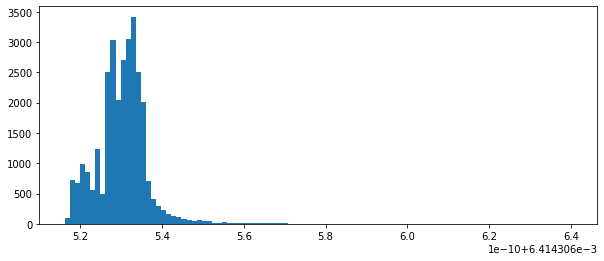

In [56]:
plt.figure(figsize=(10, 4))
plt.hist(data_filter, bins=100);

In [57]:
#datafilern = (data_filter-np.mean(data_filter))/(np.std(data_filter))
#adfuller(datafilern) same result as bellow

In [58]:
adfuller(data_filter)

(-7.604725469394774,
 2.3386223611753626e-11,
 50,
 29438,
 {'1%': -3.4305721574260146,
  '5%': -2.8616381875084556,
  '10%': -2.5668222622264043},
 -1457591.7554790569)

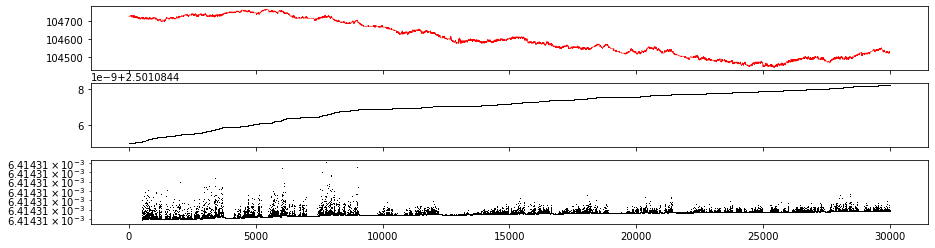

In [59]:
fig, axr = plt.subplots(3, sharex=True, figsize=(15,4))
axr[0].plot(dfdata.mlast[:30000].values[:-1], 'r', lw=0.6)
axr[1].plot(np.log(data[:-1]), 'k,', lw=0.8)
axr[2].plot(np.arange(kernel.size-1, len(data)), data_filter, 'k,', lw=0.8)
axr[2].set_yscale('log')

### find begin days 

 - 30k is too few let's go to 300k - explodes machine at work

In [61]:
data = dfdata.mlast[:40000].index.values

In [77]:
dfdata.mlast.index.values[:10]

array([1569321349387, 1569321349387, 1569321349387, 1569321349389,
       1569321349389, 1569321349389, 1569321349389, 1569321349389,
       1569321349389, 1569321349389], dtype=int64)

In [83]:
dfdata.mlast.index.values[:10].astype('datetime64[ms]')

array(['2019-09-24T10:35:49.387', '2019-09-24T10:35:49.387',
       '2019-09-24T10:35:49.387', '2019-09-24T10:35:49.389',
       '2019-09-24T10:35:49.389', '2019-09-24T10:35:49.389',
       '2019-09-24T10:35:49.389', '2019-09-24T10:35:49.389',
       '2019-09-24T10:35:49.389', '2019-09-24T10:35:49.389'],
      dtype='datetime64[ms]')

In [86]:
pd.datetime.fromtimestamp(dfdata.mlast.index.values[0]//1000)

datetime.datetime(2019, 9, 24, 7, 35, 49)

In [79]:
dfdata.mlast.index.values[-10:]

array([1570205592352, 1570205592352, 1570205592352, 1570205592352,
       1570205592352, 1570205592352, 1570205592352, 1570205592354,
       1570205592355, 1570205592357], dtype=int64)

In [82]:
dfdata.mlast.index.values[-10:].astype('datetime64[ms]')

array(['2019-10-04T16:13:12.352', '2019-10-04T16:13:12.352',
       '2019-10-04T16:13:12.352', '2019-10-04T16:13:12.352',
       '2019-10-04T16:13:12.352', '2019-10-04T16:13:12.352',
       '2019-10-04T16:13:12.352', '2019-10-04T16:13:12.354',
       '2019-10-04T16:13:12.355', '2019-10-04T16:13:12.357'],
      dtype='datetime64[ms]')

In [87]:
pd.datetime.fromtimestamp(dfdata.mlast.index.values[-10]//1000)

datetime.datetime(2019, 10, 4, 13, 13, 12)

In [63]:
@jit(nopython=True)
def daydiscounted_time(data):
    daydiscounted = np.zeros(data.size)
    daybegin = data[0]
    for i in range(data.size):
        if(data[i]-daybegin > 25200000):
            daybegin = data[i]
        daydiscounted[i] = data[i] - daybegin
    return daydiscounted

In [64]:
ddata = daydiscounted_time(data)

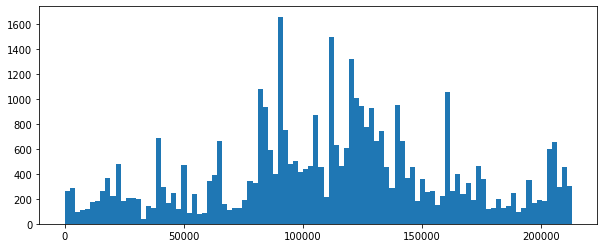

In [65]:
plt.figure(figsize=(10, 4))
plt.hist(ddata, bins=100);

In [66]:
adfuller(ddata)

(-2.100025787264542,
 0.24450423243933123,
 52,
 39947,
 {'1%': -3.43051370992206,
  '5%': -2.8616123560221176,
  '10%': -2.5668085127873974},
 342311.819745268)

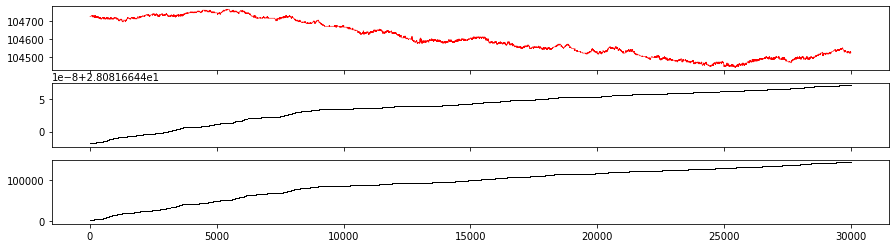

In [244]:
fig, axr = plt.subplots(3, sharex=True, figsize=(15,4))
axr[0].plot(dfdata.mlast[:30000].values[:-1], 'r', lw=0.6)
axr[1].plot(np.log(data[:-1]), 'k,', lw=0.8)
axr[2].plot(ddata, 'k,', lw=0.8)
#axr[2].set_yscale('log')